# 1 Google Play Store Apps and Reviews

Mobile apps are everywhere. They are easy to create and can be lucrative. Because of these two factors, more and more apps are being developed. In this notebook, we will do a comprehensive analysis of the Android app market by comparing over ten thousand apps in Google Play across different categories. We'll look for insights in the data to devise strategies to drive growth and retention.

Let's take a look at the data, which consists of two files:

1. apps.csv: contains all the details of the applications on Google Play. There are 13 features that describe a given app.

2. user_reviews.csv: contains 100 reviews for each app, most helpful first. The text in each review has been pre-processed and attributed with three new features: Sentiment (Positive, Negative or Neutral), Sentiment Polarity and Sentiment Subjectivity.

<img src = "https://assets.datacamp.com/production/project_619/img/google_play_store.png">

### 1.1 Import the Software Libraries

In [547]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### 1.2 Read the Apps Dataset

In [548]:
# Write your code here

appsData = pd.read_csv("./datasets/apps.csv")
#reviewsData = pd.read_csv("./datasets/user_reviews.csv")

### 1.3 Print the first five rows

In [549]:
# Write your code here
appsData.head()

,Unnamed: 0,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [550]:
# Output :-

### 1.4 Drop the Unnamed: 0 Column

In [551]:
# Write your code here

appsData.drop('Unnamed: 0', axis=1, inplace=True)

appsData


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9654,Sya9a Maroc - FR,FAMILY,4.5,38,53.0,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
9655,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6,100+,Free,0,Everyone,Education,"July 6, 2018",1,4.1 and up
9656,Parkinson Exercices FR,MEDICAL,NaN,3,9.5,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1,2.2 and up
9657,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,NaN,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


In [552]:
# Output

### 1.5 Print the Number of rows and columns

In [553]:
# Write your code here

num_rows, num_columns = appsData.shape

print(num_rows)
print(num_columns)


9659
13


In [554]:
# Output :-

### 1.6 Print the Basic Information of the dataset

In [555]:
# Write your code here
appsData.info()

print(appsData.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9659 entries, 0 to 9658
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9659 non-null   object 
 1   Category        9659 non-null   object 
 2   Rating          8196 non-null   float64
 3   Reviews         9659 non-null   int64  
 4   Size            8432 non-null   float64
 5   Installs        9659 non-null   object 
 6   Type            9659 non-null   object 
 7   Price           9659 non-null   object 
 8   Content Rating  9659 non-null   object 
 9   Genres          9659 non-null   object 
 10  Last Updated    9659 non-null   object 
 11  Current Ver     9651 non-null   object 
 12  Android Ver     9657 non-null   object 
dtypes: float64(2), int64(1), object(10)
memory usage: 981.1+ KB
            Rating       Reviews         Size
count  8196.000000  9.659000e+03  8432.000000
mean      4.173243  2.165926e+05    20.395327
std       0.536

In [556]:
# Output :-

### 1.7 Check for the Duplicated Values

- If there are duplicated values, then drop them.

In [557]:
# Write your code here
print(appsData.duplicated())
appsData.drop_duplicates()

0       False
1       False
2       False
3       False
4       False
        ...  
9654    False
9655    False
9656    False
9657    False
9658    False
Length: 9659, dtype: bool


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9654,Sya9a Maroc - FR,FAMILY,4.5,38,53.0,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
9655,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6,100+,Free,0,Everyone,Education,"July 6, 2018",1,4.1 and up
9656,Parkinson Exercices FR,MEDICAL,NaN,3,9.5,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1,2.2 and up
9657,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,NaN,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


In [558]:
# Output :-

### 1.8 Check for the Missing Values

- Just check.
- How many missing values for each column?

In [559]:
# Write your code here
print(appsData.isna())

appsData.isna().sum()

        App  Category  Rating  Reviews   Size  Installs   Type  Price  \
0     False     False   False    False  False     False  False  False   
1     False     False   False    False  False     False  False  False   
2     False     False   False    False  False     False  False  False   
3     False     False   False    False  False     False  False  False   
4     False     False   False    False  False     False  False  False   
...     ...       ...     ...      ...    ...       ...    ...    ...   
9654  False     False   False    False  False     False  False  False   
9655  False     False   False    False  False     False  False  False   
9656  False     False    True    False  False     False  False  False   
9657  False     False   False    False   True     False  False  False   
9658  False     False   False    False  False     False  False  False   

      Content Rating  Genres  Last Updated  Current Ver  Android Ver  
0              False   False         False        Fa

App                  0
Category             0
Rating            1463
Reviews              0
Size              1227
Installs             0
Type                 0
Price                0
Content Rating       0
Genres               0
Last Updated         0
Current Ver          8
Android Ver          2
dtype: int64

In [560]:
# Output :-

# 2 Data Cleaning

### 2.1 Drop the missing data from Current ver and Android Ver

- If you want to impute them, it is ok.

In [561]:
# Write your code here


appsData=appsData.dropna(subset=['Current Ver','Android Ver'])


In [562]:
# Output :-

### 2.2 Handle the missing data from Size

- First Check the distribution of the size variable using matplotlib.
- Second choose the best method to impute the data.
- Lastly, Check the distribution again.

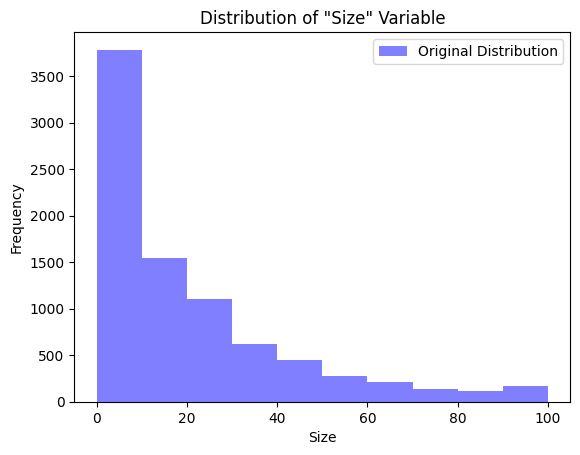

C:\Users\FzoOT\AppData\Local\Temp\ipykernel_3356\1500672776.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  appsData['Size'].fillna(median_size, inplace=True)


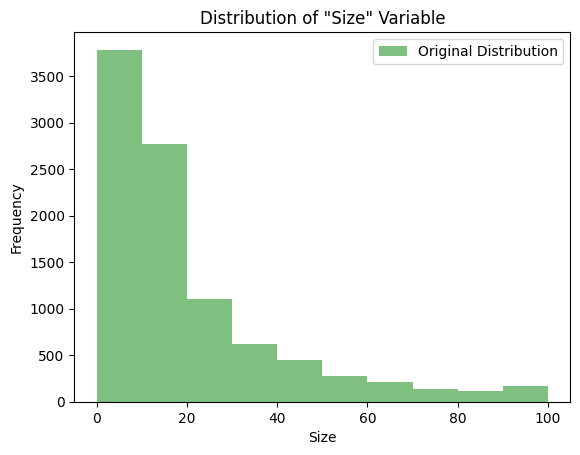

In [563]:
# Write your code here
#Check distribution
plt.hist(appsData['Size'].dropna(), bins=10, alpha=0.5, color='blue', label='Original Distribution')
plt.xlabel('Size')
plt.ylabel('Frequency')
plt.legend(loc='upper right')
plt.title('Distribution of "Size" Variable')
plt.show()

median_size = appsData['Size'].median()
appsData['Size'].fillna(median_size, inplace=True)

plt.hist(appsData['Size'], bins=10, alpha=0.5, color='green', label='Original Distribution')
plt.xlabel('Size')
plt.ylabel('Frequency')
plt.legend(loc='upper right')
plt.title('Distribution of "Size" Variable')
plt.show()


In [564]:
# Output :-

### 2.3 Handle the missing data from Rating

- Because it is a rating feature, there are a lot of methods we can do to impute this feature, such as using another data that contains the reviews (every rating for each app) then analyze the sentiment using NLP, or do another methods (you can search for this situation).
- But, now choose the suitable method for imputation that is easy and good.

In [565]:
# Write your code here

median_rating = appsData['Rating'].median()
print(median_rating)
appsData['Rating'].fillna(median_rating, inplace=True)

appsData



4.3


C:\Users\FzoOT\AppData\Local\Temp\ipykernel_3356\538304558.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  appsData['Rating'].fillna(median_rating, inplace=True)


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9654,Sya9a Maroc - FR,FAMILY,4.5,38,53.0,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
9655,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6,100+,Free,0,Everyone,Education,"July 6, 2018",1,4.1 and up
9656,Parkinson Exercices FR,MEDICAL,4.3,3,9.5,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1,2.2 and up
9657,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,12.0,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


In [566]:
# Output :-

### 2.4 Check the values of both Installs and Price columns

- What did you notice??
- List three notifications for both columns (maybe shared notifications).

In [567]:
# Write your code here
# Display the unique values in the "Installs" column
unique_installs = appsData['Installs'].unique()

# Display the number of unique values in the "Installs" column
num_unique_installs = len(unique_installs)

# Display the first few unique values in the "Installs" column
first_few_installs = unique_installs[:5]

# Print the results
print("Unique values in the 'Installs' column:", unique_installs)
print("Number of unique values in the 'Installs' column:", num_unique_installs)
print("First few unique values in the 'Installs' column:", first_few_installs)
print()






Unique values in the 'Installs' column: ['10,000+' '500,000+' '5,000,000+' '50,000,000+' '100,000+' '50,000+'
 '1,000,000+' '10,000,000+' '5,000+' '100,000,000+' '1,000,000,000+'
 '1,000+' '500,000,000+' '50+' '100+' '500+' '10+' '1+' '5+' '0+' '0']
Number of unique values in the 'Installs' column: 21
First few unique values in the 'Installs' column: ['10,000+' '500,000+' '5,000,000+' '50,000,000+' '100,000+']



In [568]:
# Output :-  We can remove the symbols($,+) to make it easier to do numerical operations

In [569]:
# Write your code here
#Price
# Display the unique values in the "Price" column
unique_prices = appsData['Price'].unique()

# Display the number of unique values in the "Price" column
num_unique_prices = len(unique_prices)

# Display the first few unique values in the "Price" column
first_few_prices = unique_prices[:5]

# Print the results
print("Unique values in the 'Price' column:", unique_prices)
print("Number of unique values in the 'Price' column:", num_unique_prices)
print("First few unique values in the 'Price' column:", first_few_prices)

Unique values in the 'Price' column: ['0' '$4.99' '$3.99' '$6.99' '$1.49' '$2.99' '$7.99' '$5.99' '$3.49'
 '$1.99' '$9.99' '$7.49' '$0.99' '$9.00' '$5.49' '$10.00' '$24.99'
 '$11.99' '$79.99' '$16.99' '$14.99' '$1.00' '$29.99' '$12.99' '$2.49'
 '$10.99' '$1.50' '$19.99' '$15.99' '$33.99' '$74.99' '$39.99' '$3.95'
 '$4.49' '$1.70' '$8.99' '$2.00' '$3.88' '$25.99' '$399.99' '$17.99'
 '$400.00' '$3.02' '$1.76' '$4.84' '$4.77' '$1.61' '$2.50' '$1.59' '$6.49'
 '$1.29' '$5.00' '$13.99' '$299.99' '$379.99' '$37.99' '$18.99' '$389.99'
 '$19.90' '$8.49' '$1.75' '$14.00' '$4.85' '$46.99' '$109.99' '$154.99'
 '$3.08' '$2.59' '$4.80' '$1.96' '$19.40' '$3.90' '$4.59' '$15.46' '$3.04'
 '$4.29' '$2.60' '$3.28' '$4.60' '$28.99' '$2.95' '$2.90' '$1.97'
 '$200.00' '$89.99' '$2.56' '$30.99' '$3.61' '$394.99' '$1.26' '$1.20'
 '$1.04']
Number of unique values in the 'Price' column: 92
First few unique values in the 'Price' column: ['0' '$4.99' '$3.99' '$6.99' '$1.49']


In [570]:
# Output :-  We can remove the symbols($,+) to make it easier to do numerical operations

### 2.5 Check the values for each of the object data type column

- Do not check the Installs and Price columns, we have did this before.
- Make a list that contains the columns that are good to stay as an object.
- Make a list that contains list the columns that are need to convert to categorical.
- Make a list that contains list the columns that are need to convert to Integers.
- Make a list that contains list the columns that are need to convert to Date.

In [571]:
# Write your code here
# Lists to store column conversion recommendations
columns_to_stay_as_object = []
columns_to_convert_to_categorical = []
columns_to_convert_to_integer = []
columns_to_convert_to_date = []

for column in appsData.select_dtypes(include=['object']):
    # Excluding 'Installs' and 'Price' columns
    if column not in ['Installs', 'Price']:
        unique_values = appsData[column].unique()
        num_unique_values = len(unique_values)
        
        # Determine column conversions
        is_date = False
        is_integer = True
        for value in unique_values:
            if not pd.api.types.is_integer(value):
                is_integer = False
            if pd.to_datetime(value, errors='coerce') is not pd.NaT:
                is_date = True
                break

        if is_date:
            columns_to_convert_to_date.append(column)
        elif is_integer:
            columns_to_convert_to_integer.append(column)
        elif num_unique_values <= 10:
            columns_to_convert_to_categorical.append(column)
        else:
            columns_to_stay_as_object.append(column)

# Print the results
print("Columns to stay as object:", columns_to_stay_as_object)
print("Columns to convert to categorical:", columns_to_convert_to_categorical)
print("Columns to convert to integers:", columns_to_convert_to_integer)
print("Columns to convert to Date:", columns_to_convert_to_date)

Columns to stay as object: ['App', 'Category', 'Genres', 'Android Ver']
Columns to convert to categorical: ['Type', 'Content Rating']
Columns to convert to integers: []
Columns to convert to Date: ['Last Updated', 'Current Ver']


### 2.6 Clean the Installs and Price columns

- Remove unwanted characters.

In [572]:
# Write your code here
# Clean the 'Installs' column
appsData['Installs'] = appsData['Installs'].str.replace(',', '', regex=True)
appsData['Installs'] = appsData['Installs'].str.replace(r'\+', '', regex=True)

appsData['Installs']

C:\Users\FzoOT\AppData\Local\Temp\ipykernel_3356\4292736773.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  appsData['Installs'] = appsData['Installs'].str.replace(',', '', regex=True)
C:\Users\FzoOT\AppData\Local\Temp\ipykernel_3356\4292736773.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  appsData['Installs'] = appsData['Installs'].str.replace(r'\+', '', regex=True)


0          10000
1         500000
2        5000000
3       50000000
4         100000
          ...   
9654        5000
9655         100
9656        1000
9657        1000
9658    10000000
Name: Installs, Length: 9649, dtype: object

In [573]:
# Output :-

In [574]:
# Write your code here
# Clean the 'Price' column
appsData['Price'] = appsData['Price'].str.replace('$', '', regex=False)
appsData['Price'] = appsData['Price'].replace('Free', '0', regex=False).astype(float)

appsData['Price'].unique()

C:\Users\FzoOT\AppData\Local\Temp\ipykernel_3356\262234172.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  appsData['Price'] = appsData['Price'].str.replace('$', '', regex=False)
C:\Users\FzoOT\AppData\Local\Temp\ipykernel_3356\262234172.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  appsData['Price'] = appsData['Price'].replace('Free', '0', regex=False).astype(float)


array([  0.  ,   4.99,   3.99,   6.99,   1.49,   2.99,   7.99,   5.99,
         3.49,   1.99,   9.99,   7.49,   0.99,   9.  ,   5.49,  10.  ,
        24.99,  11.99,  79.99,  16.99,  14.99,   1.  ,  29.99,  12.99,
         2.49,  10.99,   1.5 ,  19.99,  15.99,  33.99,  74.99,  39.99,
         3.95,   4.49,   1.7 ,   8.99,   2.  ,   3.88,  25.99, 399.99,
        17.99, 400.  ,   3.02,   1.76,   4.84,   4.77,   1.61,   2.5 ,
         1.59,   6.49,   1.29,   5.  ,  13.99, 299.99, 379.99,  37.99,
        18.99, 389.99,  19.9 ,   8.49,   1.75,  14.  ,   4.85,  46.99,
       109.99, 154.99,   3.08,   2.59,   4.8 ,   1.96,  19.4 ,   3.9 ,
         4.59,  15.46,   3.04,   4.29,   2.6 ,   3.28,   4.6 ,  28.99,
         2.95,   2.9 ,   1.97, 200.  ,  89.99,   2.56,  30.99,   3.61,
       394.99,   1.26,   1.2 ,   1.04])

In [575]:
# Output :-

### 2.7 Convert the data type of each object data type columns

- That is including Installs and Price columns.
- Build a function that receives 3 parameters
    1. List of columns you want to convert.
    2. Dataset which in our case the android apps.
    3. Data type that you want to convert to.
- In the function, loop through each column from the list.
- Use df[col].astype(data_type) function to convert the columns.
- Note : The list of date columns need not included in this step.

In [576]:
def convert_col_data_type(lst_of_cols, dataset, data_type):
     for col in lst_of_cols:
        dataset[col] = dataset[col].astype(data_type)

### 2.8 Convert the list of date columns into a suitable format.

- Use pd.to_datetime(df[col]) function.

In [577]:
# Write your code here

# List of date columns
date_columns = ['Last Updated']

# Convert the specified date columns to a suitable format
appsData[date_columns] = appsData[date_columns].apply(pd.to_datetime, errors='coerce')

# Print the dataset with converted date columns
print(appsData.dtypes)

appsData

App                       object
Category                  object
Rating                   float64
Reviews                    int64
Size                     float64
Installs                  object
Type                      object
Price                    float64
Content Rating            object
Genres                    object
Last Updated      datetime64[ns]
Current Ver               object
Android Ver               object
dtype: object


C:\Users\FzoOT\AppData\Local\Temp\ipykernel_3356\1813789748.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  appsData[date_columns] = appsData[date_columns].apply(pd.to_datetime, errors='coerce')


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,10000,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000,Free,0.0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,50000000,Free,0.0,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000,Free,0.0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9654,Sya9a Maroc - FR,FAMILY,4.5,38,53.0,5000,Free,0.0,Everyone,Education,2017-07-25,1.48,4.1 and up
9655,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6,100,Free,0.0,Everyone,Education,2018-07-06,1,4.1 and up
9656,Parkinson Exercices FR,MEDICAL,4.3,3,9.5,1000,Free,0.0,Everyone,Medical,2017-01-20,1,2.2 and up
9657,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,12.0,1000,Free,0.0,Mature 17+,Books & Reference,2015-01-19,Varies with device,Varies with device


In [578]:
# Output :-

# 3 Data Visualization

### 3.1 Plot the distribution for each categories using Bar Chart.

- The figure size is 16 by 8.
- Set the title, x label, and y label.
- Make sure that the names of the categories not overlapped (use xtricks method with some rotation value).

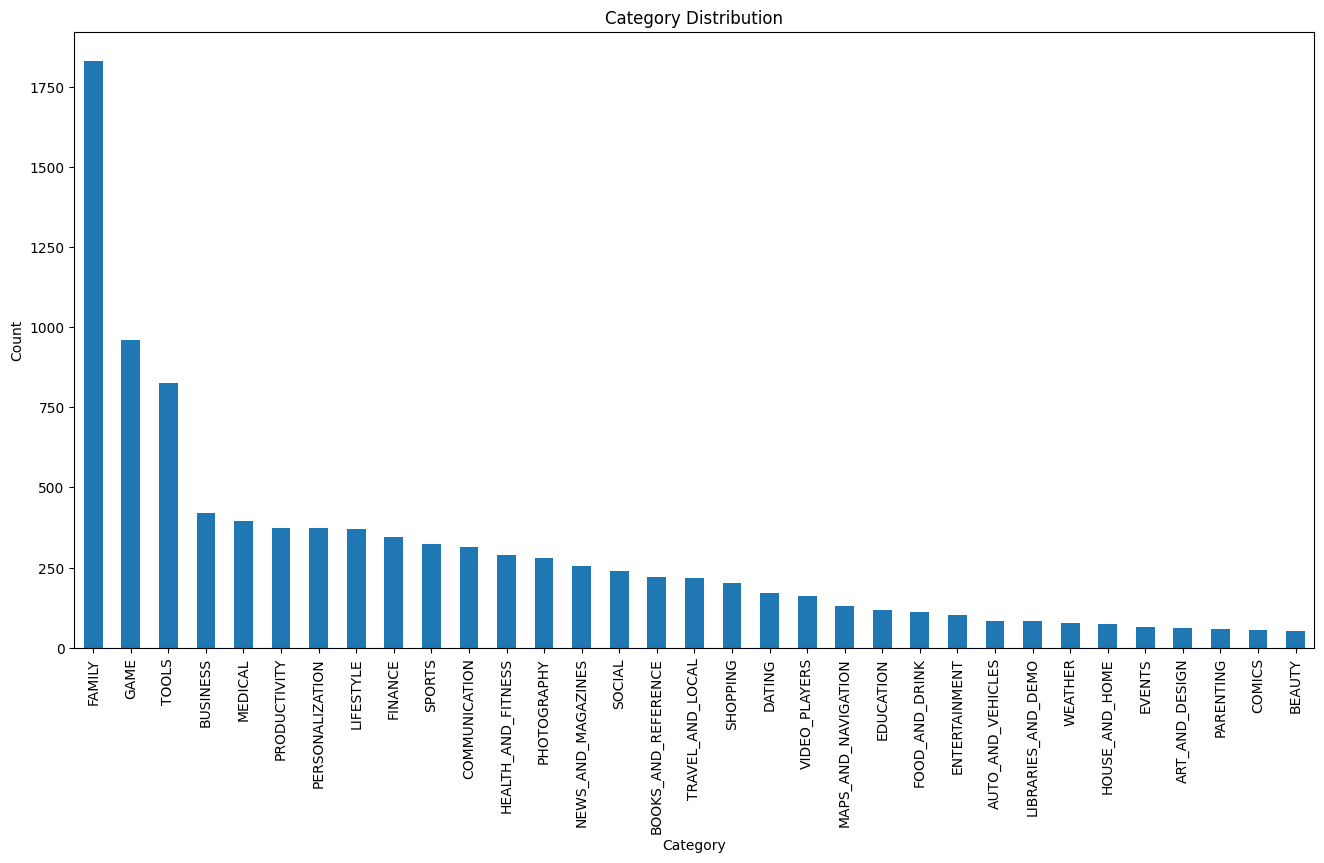

In [579]:
# Count the unique occurrences of each category
category_counts = appsData['Category'].value_counts()

# Create a bar chart
plt.figure(figsize=(16, 8))

# Plot the bars
category_counts.plot(kind='bar')

# Set the title, x label, and y label
plt.title('Category Distribution')
plt.xlabel('Category')
plt.ylabel('Count')

# Rotate x-axis labels to avoid overlap
plt.xticks(rotation=90)

# Show the plot
plt.show()

In [580]:
# Output :-

### 3.2 What are the categories has the heighest share of active apps?

- Use Bar Chart.
- Visualize the best 5 categories.

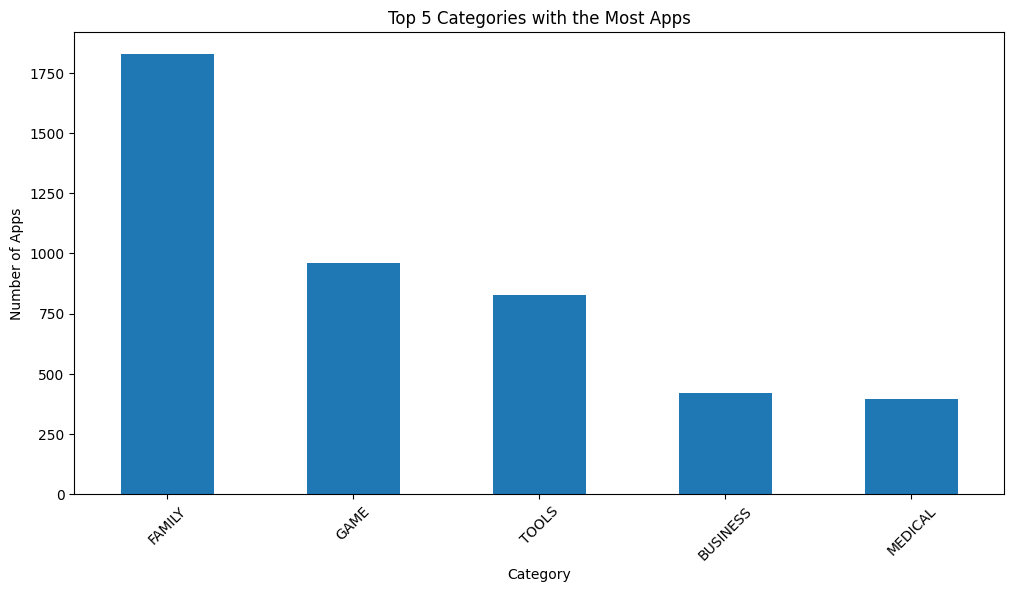

In [581]:
# Count the number of apps in each category
category_counts = appsData['Category'].value_counts()

# Get the top 5 categories with the most apps
top_categories = category_counts.head(5)

# Create a bar chart for the top 5 categories
plt.figure(figsize=(12, 6))
top_categories.plot(kind='bar')

# Set the title, x label, and y label
plt.title('Top 5 Categories with the Most Apps')
plt.xlabel('Category')
plt.ylabel('Number of Apps')

# Rotate x-axis labels to avoid overlap
plt.xticks(rotation=45)

# Show the plot
plt.show()




In [582]:
# Output :-

In [583]:
# Write your code here


In [584]:
# Output :-

### 3.3 What are the categories has the lowest share of active apps?

- Use Bar Chart.
- Visualize the lowest 5 apps.

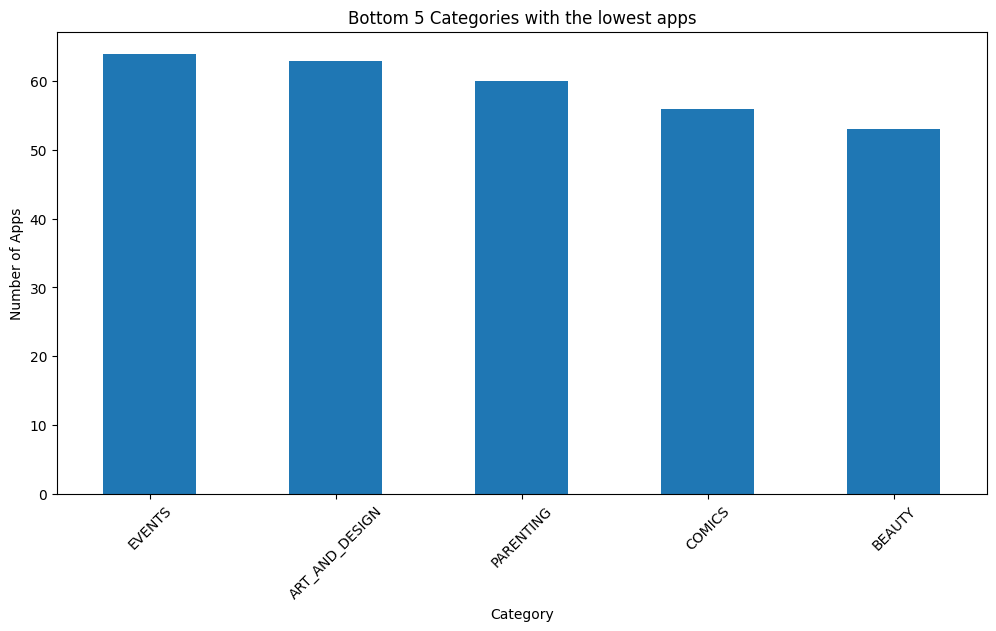

In [585]:
# Write your code here
# Count the number of apps in each category
category_counts = appsData['Category'].value_counts()

# Get the top 5 categories with the most apps
top_categories = category_counts.tail(5)

# Create a bar chart for the top 5 categories
plt.figure(figsize=(12, 6))
top_categories.plot(kind='bar')

# Set the title, x label, and y label
plt.title('Bottom 5 Categories with the lowest apps')
plt.xlabel('Category')
plt.ylabel('Number of Apps')

# Rotate x-axis labels to avoid overlap
plt.xticks(rotation=45)

# Show the plot
plt.show()

In [586]:
# Output :-

### 3.4 How does the app average rating vary across different categories?

- The figure size is 12 by 12.
- Use Horizontal Bar Chart.
- Set the title, x label, and y label.

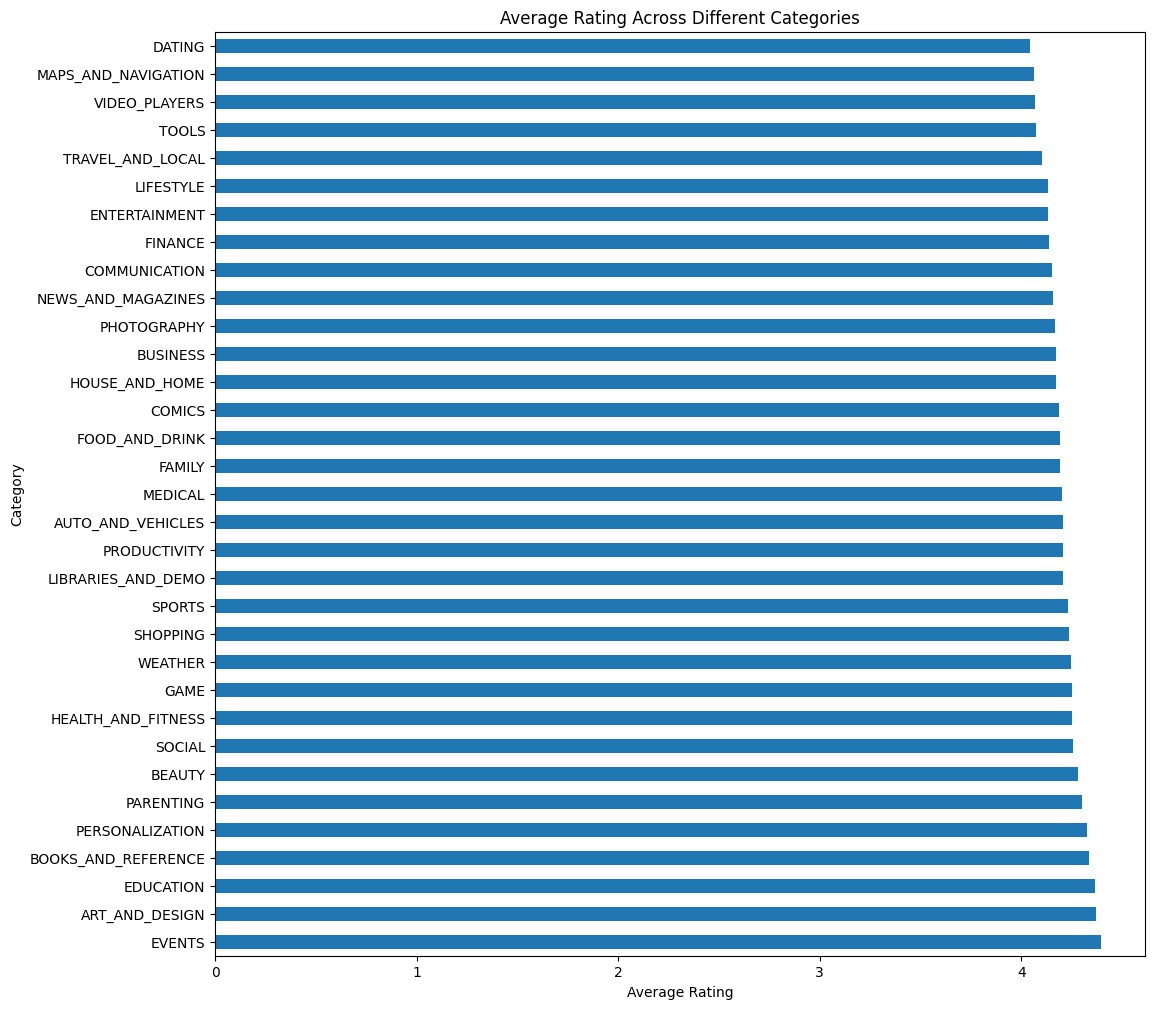

In [587]:
# Write your code here
# Group the dataset by 'Category' and calculate the average rating for each category
category_avg_rating = appsData.groupby('Category')['Rating'].mean()

# Create a horizontal bar chart
plt.figure(figsize=(12, 12))
category_avg_rating.sort_values(ascending=False).plot(kind='barh')

# Set the title, x label, and y label
plt.title('Average Rating Across Different Categories')
plt.xlabel('Average Rating')
plt.ylabel('Category')

# Show the plot
plt.show()

In [588]:
# Output :-

### 3.5 Plot the Average app size for each content rating distribution

- You need to use group by.
- Use Bar Plot.
- Set the width as 0.35.
- Label = 'Average size".
- Show the legend.
- Set the title, x label, and y label.

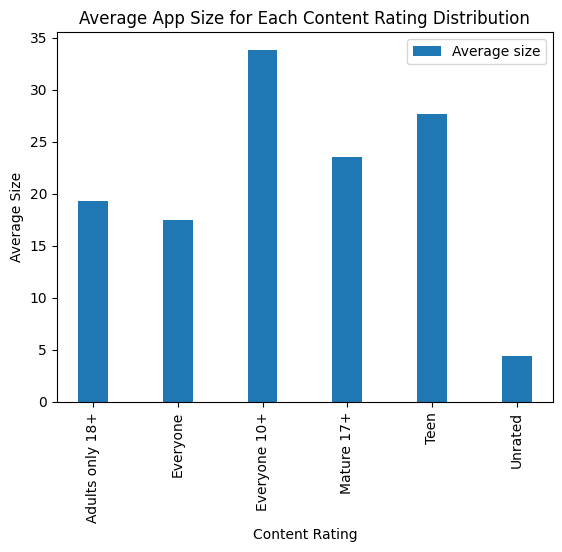

In [589]:
# Write your code here
# Group the dataset by 'Content Rating' and calculate the average size for each content rating
content_avg_size = appsData.groupby('Content Rating')['Size'].mean()

# Create a bar plot with the specified width and labels
width = 0.35
content_avg_size.plot(kind='bar', width=width, label='Average size')

# Set the title, x label, and y label
plt.title('Average App Size for Each Content Rating Distribution')
plt.xlabel('Content Rating')
plt.ylabel('Average Size')

# Show the legend
plt.legend()

# Show the plot
plt.show()

In [590]:
# Output :-

### 3.6 Common content ratings for different categories using a stacked bar chart.

<Figure size 1200x800 with 0 Axes>

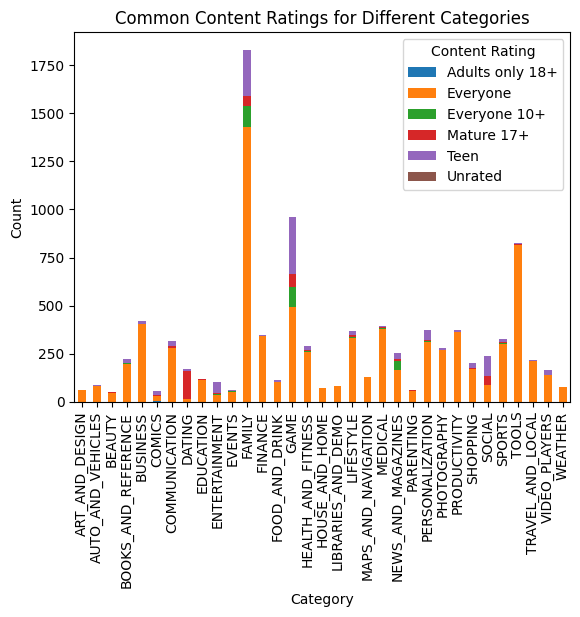

In [591]:
# Write your code here
# Group the data by 'Category' and 'Content Rating' and count occurrences
grouped = appsData.groupby(['Category', 'Content Rating']).size().unstack(fill_value=0)

# Create a stacked bar chart
plt.figure(figsize=(12, 8))
grouped.plot(kind='bar', stacked=True)

# Set the title, x label, and y label
plt.title('Common Content Ratings for Different Categories')
plt.xlabel('Category')
plt.ylabel('Count')

# Show the plot
plt.show()

In [592]:
# Output :-

### 3.7 Use area plot to show the change in total reviews over the years.

- Extract the year from your date column as new column "Year".
- Use group by function.
- The figure size is 10 by 6.
- The color of the plot is "skyblue".
- The alpha is 0.4.
- Set the title, x label, and y label.

C:\Users\FzoOT\AppData\Local\Temp\ipykernel_3356\1971186905.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  appsData['Year'] = pd.to_datetime(appsData['Last Updated']).dt.year


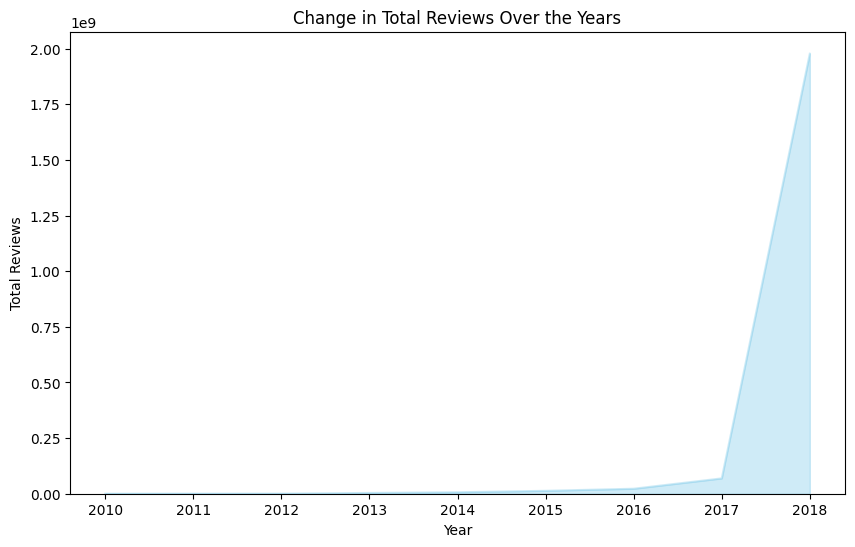

In [593]:
# Write your code here
# Extract the year from the 'Last Updated' column and create a new 'Year' column
appsData['Year'] = pd.to_datetime(appsData['Last Updated']).dt.year

# Group the data by 'Year' and calculate the total reviews for each year
yearly_reviews = appsData.groupby('Year')['Reviews'].sum()

# Create an area plot to show the change in total reviews over the years
plt.figure(figsize=(10, 6))
yearly_reviews.plot(kind='area', color='skyblue', alpha=0.4)

# Set the title, x label, and y label
plt.title('Change in Total Reviews Over the Years')
plt.xlabel('Year')
plt.ylabel('Total Reviews')

# Show the plot
plt.show()







In [594]:
# Output :-

### 3.8 Use line plot to show the total Installs over the years.

- Use the same extracted year column.
- Use group by function.
- The figure size is 10 by 6.
- The color of the plot is "skyblue".
- The marker is 'o'.
- Set the title, x label, and y label.

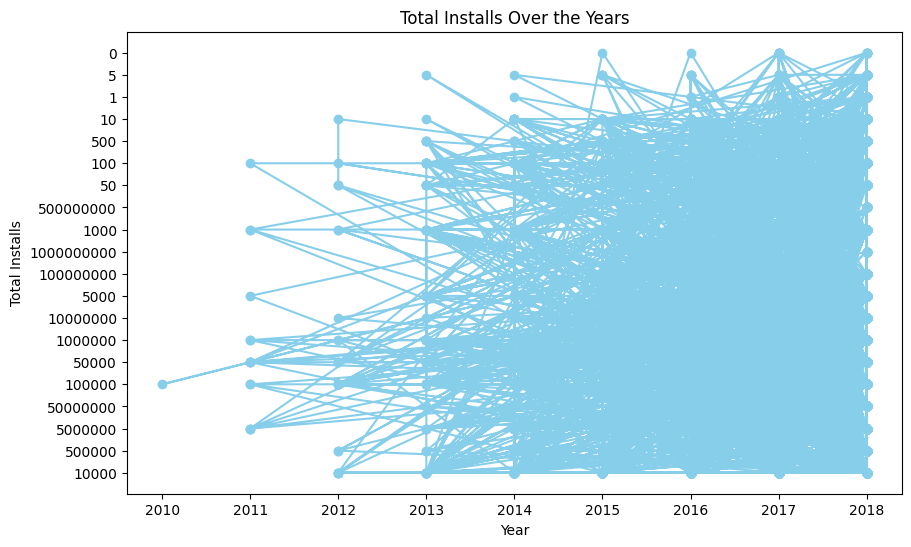

In [595]:
# Write your code here
#We use group by previuos questions to extract year
# Create a line plot to show the total installs over the years
plt.figure(figsize=(10, 6))
plt.plot(appsData['Year'], appsData['Installs'], color='skyblue', marker='o')

# Set the title, x label, and y label
plt.title('Total Installs Over the Years')
plt.xlabel('Year')
plt.ylabel('Total Installs')

# Show the plot
plt.show()

In [596]:
# Output :-

### 3.9 Make a subplot with four histograms

- Two rows and two columns.
- The first hist : Distribution of app sizes.
- The second hist : App rating distribution.
- The third hist : Distribution of app installs.
- The fourth hist : Distribution of app prices.
- Use 30 bins and different colors.

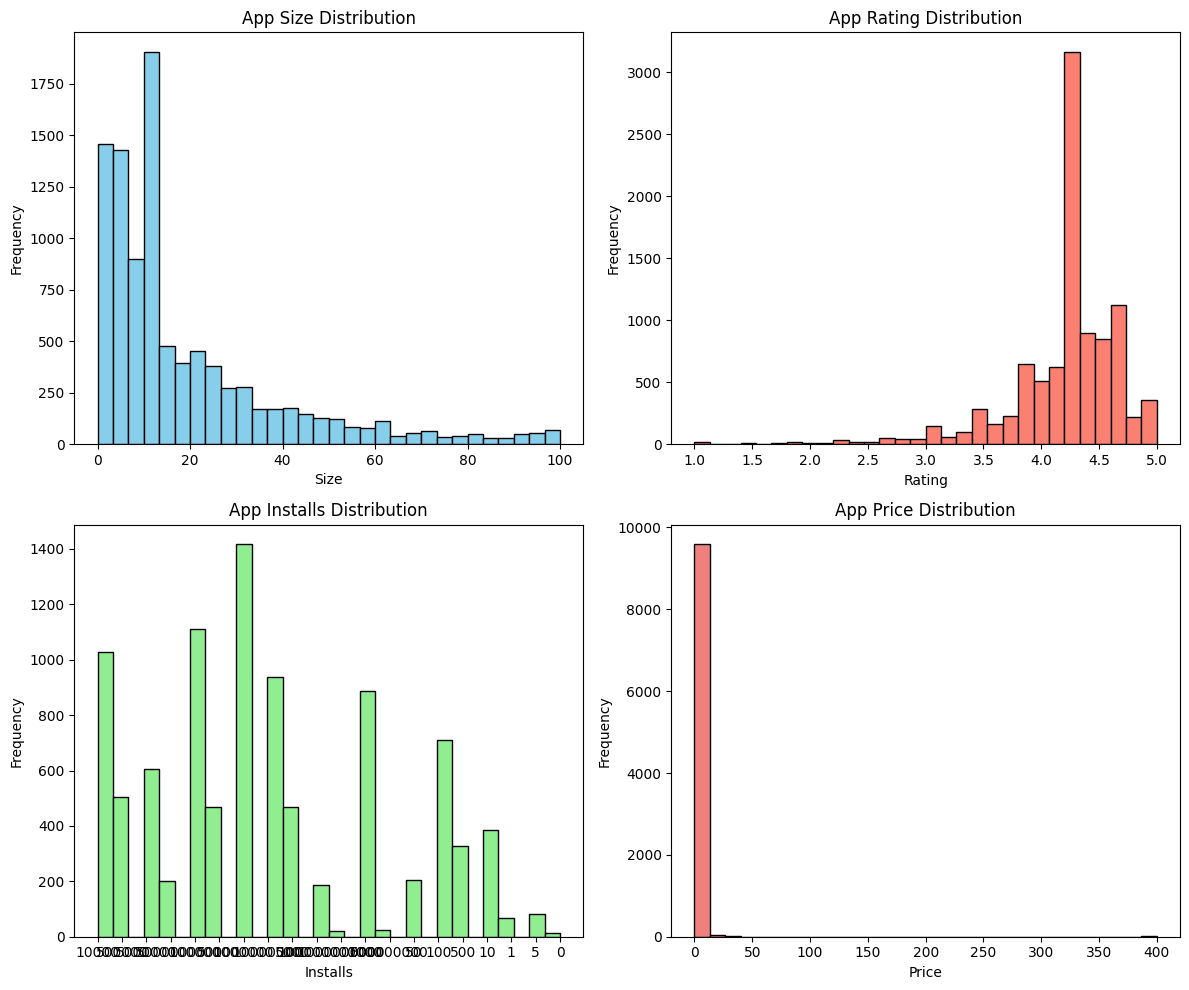

In [597]:
# Write your code here

# Create a subplot with four histograms
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))

# Plot the distribution of app sizes
axes[0, 0].hist(appsData['Size'], bins=30, color='skyblue', edgecolor='black')
axes[0, 0].set_title('App Size Distribution')
axes[0, 0].set_xlabel('Size')
axes[0, 0].set_ylabel('Frequency')

# Plot the app rating distribution
axes[0, 1].hist(appsData['Rating'], bins=30, color='salmon', edgecolor='black')
axes[0, 1].set_title('App Rating Distribution')
axes[0, 1].set_xlabel('Rating')
axes[0, 1].set_ylabel('Frequency')

# Plot the distribution of app installs
axes[1, 0].hist(appsData['Installs'], bins=30, color='lightgreen', edgecolor='black')
axes[1, 0].set_title('App Installs Distribution')
axes[1, 0].set_xlabel('Installs')
axes[1, 0].set_ylabel('Frequency')

# Plot the distribution of app prices
axes[1, 1].hist(appsData['Price'], bins=30, color='lightcoral', edgecolor='black')
axes[1, 1].set_title('App Price Distribution')
axes[1, 1].set_xlabel('Price')
axes[1, 1].set_ylabel('Frequency')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

In [598]:
# Output :-

### 3.10 Create a pie chart to visualize the categories.

- Take the top 10 apps.
- autopct parameter is '%1.1f%%'.

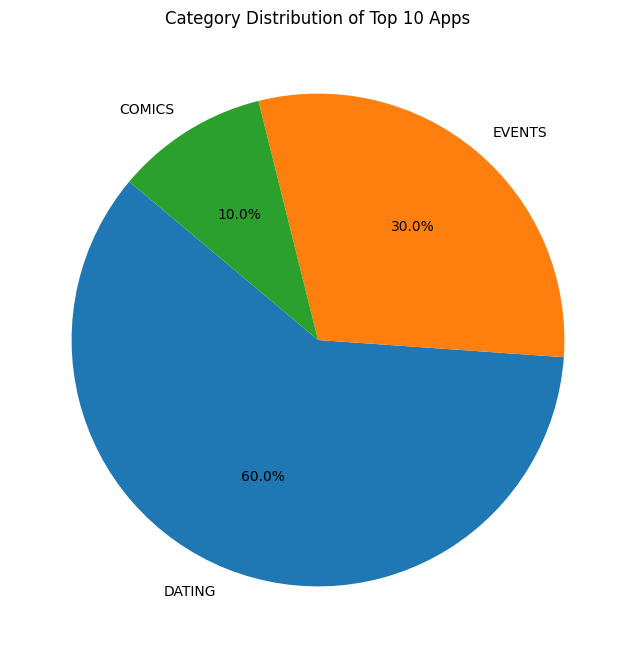

In [599]:
# Write your code here

# Select the top 10 apps (e.g., based on ratings)
top_10_apps = appsData.nlargest(10, 'Rating')

# Count the number of apps in each category among the top 10
category_counts = top_10_apps['Category'].value_counts()

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', startangle=140)

# Set the title
plt.title('Category Distribution of Top 10 Apps')

# Show the pie chart
plt.show()

In [600]:
# Output :-

### 3.11 Pie chart of the distribution of content ratings.

- Do not take into account the Unrated value.
- So, the number of values are 5 (Everyone, Teen, Mature 17+, Everyone 10+, Adults only 18+).
- The figure size is 8 by 8.
- Enable the shadow parameter.
- Same as the pie chart before.
- The explode parameter is = [0.25, 0.15, 0, 0, 0].

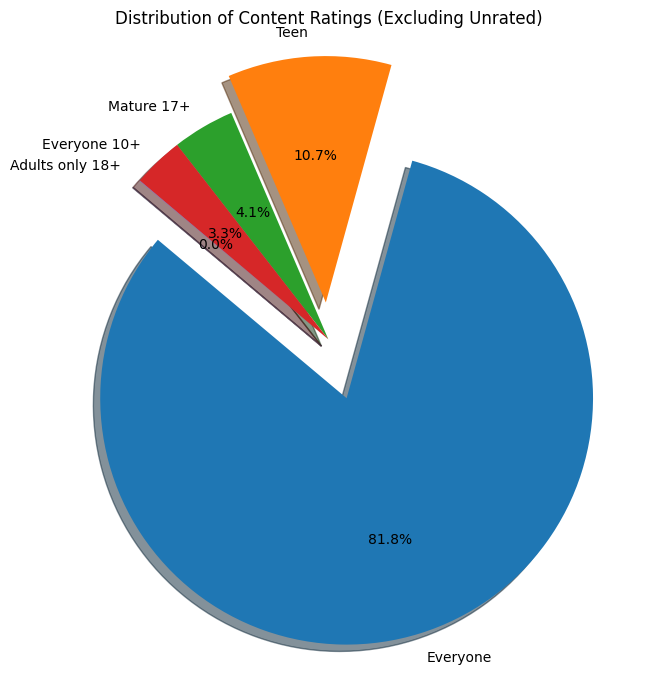

In [601]:
# Write your code here

# Filter out the 'Unrated' value
filtered_data = appsData[appsData['Content Rating'] != 'Unrated']

# Count the number of apps in each content rating
content_rating_counts = filtered_data['Content Rating'].value_counts()

# Create a pie chart with specified parameters
plt.figure(figsize=(8, 8))
explode = [0.25, 0.15, 0, 0, 0]  # Explode parameter
plt.pie(content_rating_counts, labels=content_rating_counts.index, autopct='%1.1f%%', startangle=140, shadow=True, explode=explode)

# Set the title
plt.title('Distribution of Content Ratings (Excluding Unrated)')

# Show the pie chart
plt.show()

In [602]:
# Output :-

### 3.12 Create two Box plots in the same figure for Type column

- Based on the number of installs.
- The figure size is 10 by 6.
- Log the y axis by using plt.yscale() method.

C:\Users\FzoOT\AppData\Local\Temp\ipykernel_3356\2491476721.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  appsData['Installs'] = pd.to_numeric(appsData['Installs'], errors='coerce')


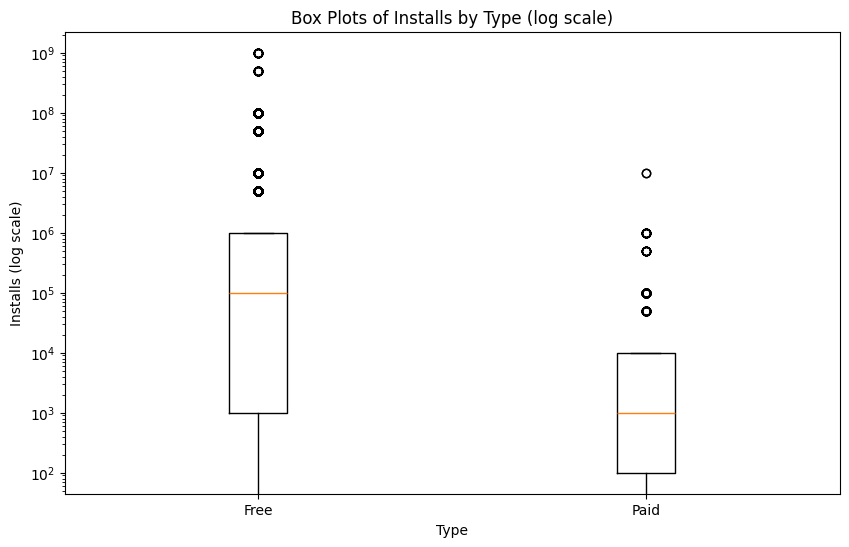

In [603]:
# Convert 'Installs' to numeric
appsData['Installs'] = pd.to_numeric(appsData['Installs'], errors='coerce')

# Create two box plots for 'Type' based on 'Installs' in the same figure
plt.figure(figsize=(10, 6))
plt.yscale('log')  # Logarithmic scale for the y-axis
plt.boxplot([appsData[appsData['Type'] == 'Free']['Installs'], appsData[appsData['Type'] == 'Paid']['Installs']],
            labels=['Free', 'Paid'])

# Set the title and labels
plt.title('Box Plots of Installs by Type (log scale)')
plt.xlabel('Type')
plt.ylabel('Installs (log scale)')

# Show the box plots
plt.show()

In [604]:
# Output :-